This is a computer simulation that will attempt to answer the question, first in 2D and eventually in 3d, what does the iso line or iso surface look like for a constant time (or distance) difference, for a Time of flight calcualtion between two ears. 

In [4]:
#define simulation constants
Lx = -1     #left ear x
Ly =  0     #left ear y
Rx =  1     #right ear x
Ry =  0     #right ear y

0

In [2]:
"""solve the non-linear algebreic equations of constraint using the Newton-Rapson method"""
function NRsolve(Lx,Ly,Rx,Ry,Px0,Py0,c,d2)
    #break counter
    ctr = 1  
    #initialize q
    q = [Px0,Py0]
    while norm([q]) > .0005
        #calculate the jacobian of the expression
        jac = [2*(q[1] - Lx) 2*(q[2] - Ly) ;
               2*(q[1] - Rx) 2*(q[2] - Ry)]
        #calculate the expression @ guess
        phi = [(q[1] - Lx)^2 + (q[2] - Ly)^2 - (c + d2) ; (q[1] - Rx)^2 + (q[2] - Ry)^2 - d2]
        
        #calcuate dq
        dq = jac \ -phi
        
        #increment dq
        q += dq
        
         #increment ctr
        ctr += 1
        if ctr > 100 break end
    end
    return q  #q = Px,Py
end

NRsolve

In [3]:
"""solve the non-linear algebreic equations of constraint using the Newton-Rapson method"""
Px0 = 1
Py0 = 1
c = 0
d2 = 2
jac = "fuck"
phi ="damn"
dq = 22
ctr = 1
dqHist = Float64[]

#initialize q
q = [Px0 ; Py0]
while norm([dq]) > .001
    #calculate the jacobian of the expression
    jac = [2*(q[1] - Lx) 2*(q[2] - Ly) ;
           2*(q[1] - Rx) 2*(q[2] - Ry)]
    #calculate the expression @ guess
    phi = [(q[1] - Lx)^2 + (q[2] - Ly)^2 - (c + d2) ; (q[1] - Rx)^2 + (q[2] - Ry)^2 - d2]

    #calcuate dq
    dq = jac \ -phi

    #increment dq
    q += dq
    
    #increment ctr
    ctr += 1
    if ctr > 10000 break end
    
    #push
    push!(dqHist,norm(dq))
end



LoadError: [91mUndefVarError: Lx not defined[39m

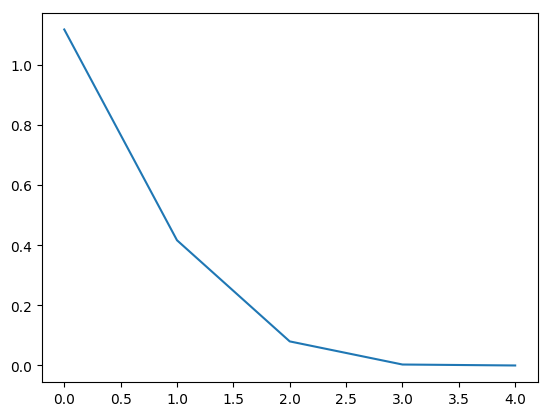

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001DF9D68>

In [47]:
using PyPlot

plot(dqHist)

now we will test out our function with (several) test cases

In [7]:
#we know the analytical solution to this one:
println("value should be (0,1): ", NRsolve(Lx,Ly,Rx,Ry,1,1,0,2))

value should be (0,1): [0.0, 1.0]


In [4]:
cos(pi/3)

0.5000000000000001

In [5]:
2*sin(pi/3)

1.7320508075688772

In [8]:
(3)^.5

1.7320508075688772